## Load Data

Download data dari google drive menggunakan gdown lalu memuatnya ke dalam dataframe

In [5]:
import gdown

gdown.download(id='1uvjuxqSPExsel8l_w4X_E66SgXaJ_DZ4')

Downloading...
From: https://drive.google.com/uc?id=1uvjuxqSPExsel8l_w4X_E66SgXaJ_DZ4
To: c:\Users\doddy-s\source\repos\anilist-users-clustering\anilist-users-list.csv
100%|██████████| 494k/494k [00:00<00:00, 500MB/s]


'anilist-users-list.csv'

In [6]:
import pandas as pd

df = pd.read_csv('./anilist-users-list.csv')

## EDA

### Melihat beberapa baris data

In [7]:
df.head()

,username,Action,Adventure,Comedy,Drama,Ecchi,Fantasy,Hentai,Horror,Mahou Shoujo,Mecha,Music,Mystery,Psychological,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller
0,Fauxx,7.332311,7.549333,7.297910,7.839076,6.930827,7.370882,3.5,7.642222,NaN,6.751471,7.611111,7.955556,7.845161,7.281188,7.298333,7.573333,6.972727,7.508333,7.910256
1,Bola08,7.835165,8.046809,7.683824,8.333333,7.255814,7.840278,NaN,8.060000,7.750000,7.100000,7.800000,8.083333,8.435000,7.470000,7.793548,7.779167,8.300000,7.882609,8.530000
2,ShinyaH,7.531599,7.660377,7.501931,7.389333,7.346591,7.627155,4.5,6.176471,9.028571,8.491803,7.486486,7.268116,7.012821,7.800830,7.497110,7.395122,6.487805,7.417910,6.894737
3,superp2222,6.761261,7.602778,6.039216,6.954255,4.522222,6.093684,NaN,6.610000,0.000000,8.280000,7.150000,5.694595,6.277500,6.333766,7.959375,6.805797,8.333333,6.416364,8.300000
4,moyaiking,7.105263,7.026316,7.214286,7.481928,7.500000,7.183673,NaN,7.142857,8.333333,7.000000,7.000000,7.480000,7.583333,6.962963,6.538462,7.542857,8.000000,6.743590,7.866667


### Melihat info data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   username       1871 non-null   object 
 1   Action         1871 non-null   float64
 2   Adventure      1871 non-null   float64
 3   Comedy         1871 non-null   float64
 4   Drama          1871 non-null   float64
 5   Ecchi          1828 non-null   float64
 6   Fantasy        1871 non-null   float64
 7   Hentai         429 non-null    float64
 8   Horror         1840 non-null   float64
 9   Mahou Shoujo   1230 non-null   float64
 10  Mecha          1773 non-null   float64
 11  Music          1742 non-null   float64
 12  Mystery        1870 non-null   float64
 13  Psychological  1871 non-null   float64
 14  Romance        1870 non-null   float64
 15  Sci-Fi         1871 non-null   float64
 16  Slice of Life  1870 non-null   float64
 17  Sports         1702 non-null   float64
 18  Supernat

### Melihat data duplikasi

Data tidak memiliki duplikasi

In [9]:
print('Data duplikasi =', df.duplicated().sum())

Data duplikasi = 0


### Melihat data yang null

Data null menandakan user Anilist tersebut belum pernah menonton/merating genre tersebut

In [10]:
df.isna().sum()

username            0
Action              0
Adventure           0
Comedy              0
Drama               0
Ecchi              43
Fantasy             0
Hentai           1442
Horror             31
Mahou Shoujo      641
Mecha              98
Music             129
Mystery             1
Psychological       0
Romance             1
Sci-Fi              0
Slice of Life       1
Sports            169
Supernatural        0
Thriller           15
dtype: int64

### Persebaran data menggunakan boxplot

Disini data terlihat sangat tidak seimbang. Dikarenakan data seharusnya hanya berkisar antara 0 - 10

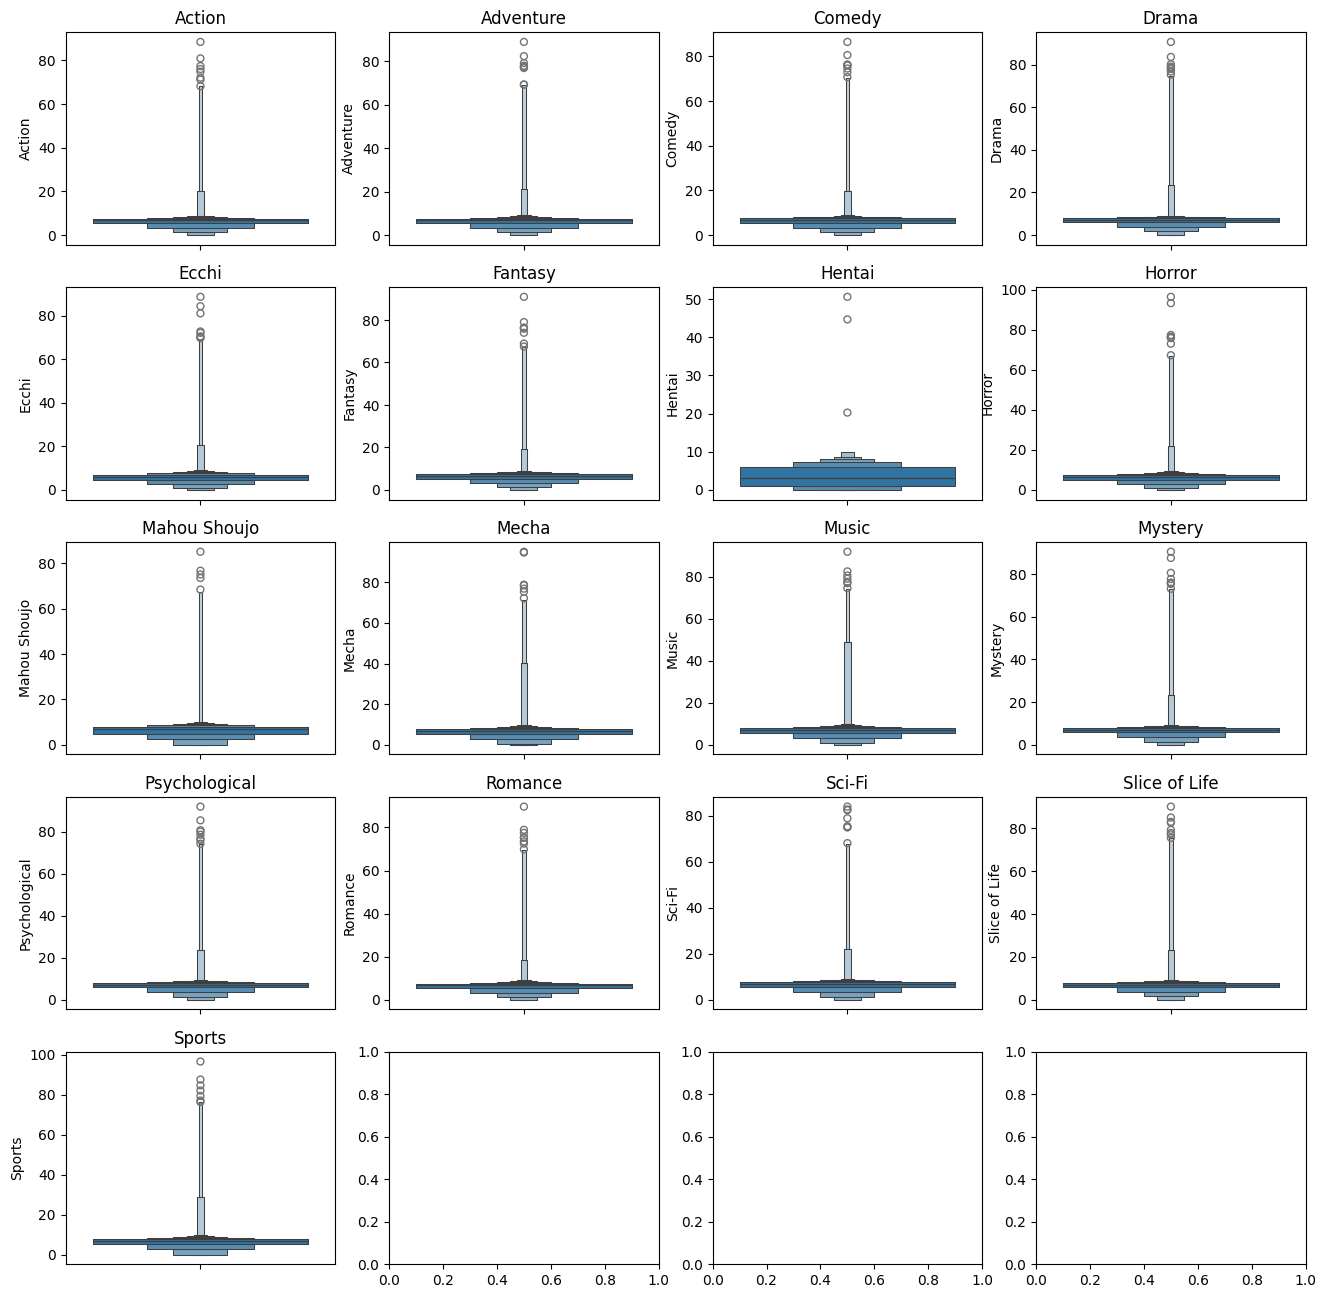

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

columns = np.delete(df.columns, np.where(df.columns == 'username'))

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(16,16))
for i, ax in enumerate(axs.flatten()):
  if i > 16:
    continue
  plt.sca(ax)
  sns.boxenplot(data = df[columns[i]])
  plt.xticks(rotation=90)
  plt.title(columns[i])


plt.show()

## Cleaning Data

### Isi NaN dengan 0

In [12]:
print('\n\nisi data NaN dengan 0................\n\n')
df = df.fillna(0)



isi data NaN dengan 0................




### Menghapus data yang tidak relevan

In [13]:
#Menghapus data diluar batas
df = df[df['Action'] <= 10]

#Menghapus genre yang tidak relevan dan terlalu banyak null
df = df.drop(['Hentai', 'Mahou Shoujo'], axis=1)

## EDA setelah data dibersihkan

### Melihat beberapa baris data

In [14]:
df.head()

,username,Action,Adventure,Comedy,Drama,Ecchi,Fantasy,Horror,Mecha,Music,Mystery,Psychological,Romance,Sci-Fi,Slice of Life,Sports,Supernatural,Thriller
0,Fauxx,7.332311,7.549333,7.297910,7.839076,6.930827,7.370882,7.642222,6.751471,7.611111,7.955556,7.845161,7.281188,7.298333,7.573333,6.972727,7.508333,7.910256
1,Bola08,7.835165,8.046809,7.683824,8.333333,7.255814,7.840278,8.060000,7.100000,7.800000,8.083333,8.435000,7.470000,7.793548,7.779167,8.300000,7.882609,8.530000
2,ShinyaH,7.531599,7.660377,7.501931,7.389333,7.346591,7.627155,6.176471,8.491803,7.486486,7.268116,7.012821,7.800830,7.497110,7.395122,6.487805,7.417910,6.894737
3,superp2222,6.761261,7.602778,6.039216,6.954255,4.522222,6.093684,6.610000,8.280000,7.150000,5.694595,6.277500,6.333766,7.959375,6.805797,8.333333,6.416364,8.300000
4,moyaiking,7.105263,7.026316,7.214286,7.481928,7.500000,7.183673,7.142857,7.000000,7.000000,7.480000,7.583333,6.962963,6.538462,7.542857,8.000000,6.743590,7.866667


### Melihat info data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1856 entries, 0 to 1870
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   username       1856 non-null   object 
 1   Action         1856 non-null   float64
 2   Adventure      1856 non-null   float64
 3   Comedy         1856 non-null   float64
 4   Drama          1856 non-null   float64
 5   Ecchi          1856 non-null   float64
 6   Fantasy        1856 non-null   float64
 7   Horror         1856 non-null   float64
 8   Mecha          1856 non-null   float64
 9   Music          1856 non-null   float64
 10  Mystery        1856 non-null   float64
 11  Psychological  1856 non-null   float64
 12  Romance        1856 non-null   float64
 13  Sci-Fi         1856 non-null   float64
 14  Slice of Life  1856 non-null   float64
 15  Sports         1856 non-null   float64
 16  Supernatural   1856 non-null   float64
 17  Thriller       1856 non-null   float64
dtypes: float64(17

### Melihat data yang null

Data null menandakan user Anilist tersebut belum pernah menonton/merating genre tersebut

In [16]:
df.isna().sum()

username         0
Action           0
Adventure        0
Comedy           0
Drama            0
Ecchi            0
Fantasy          0
Horror           0
Mecha            0
Music            0
Mystery          0
Psychological    0
Romance          0
Sci-Fi           0
Slice of Life    0
Sports           0
Supernatural     0
Thriller         0
dtype: int64

### Persebaran data menggunakan boxplot

Disini data sudah seimbang

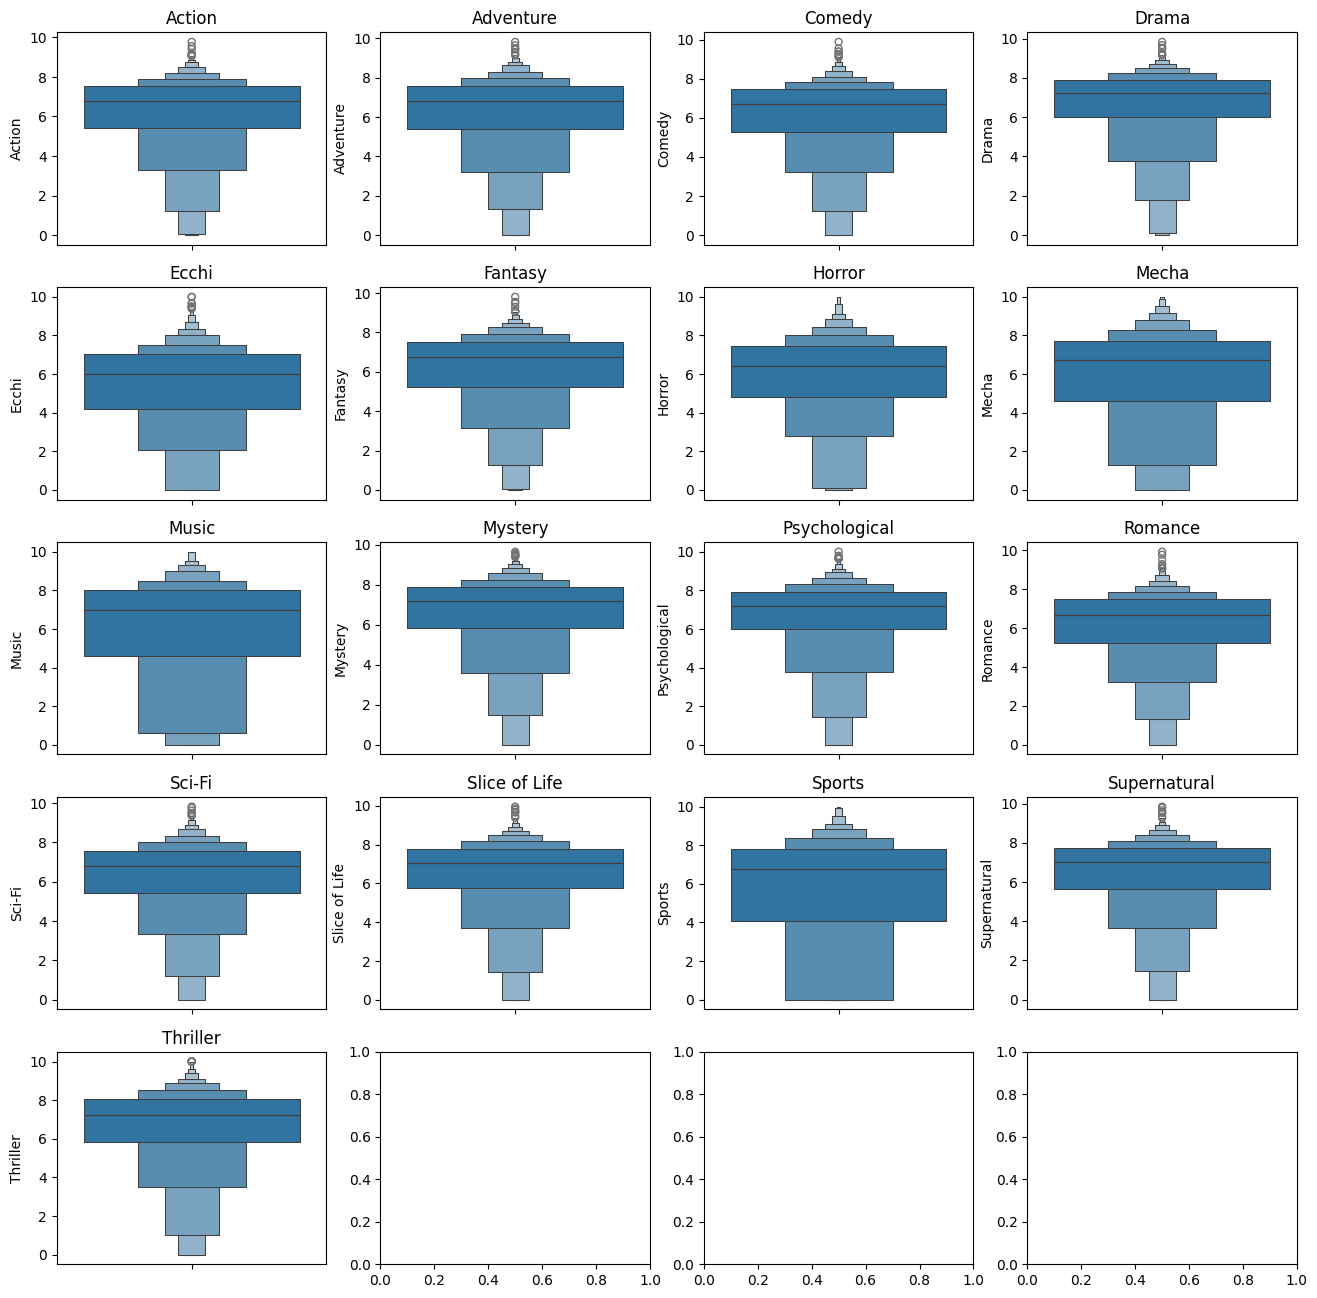

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

columns = np.delete(df.columns, np.where(df.columns == 'username'))

fig, axs = plt.subplots(nrows=5, ncols=4, figsize=(16,16))
for i, ax in enumerate(axs.flatten()):
  if i > 16:
    continue
  plt.sca(ax)
  sns.boxenplot(data = df[columns[i]])
  plt.xticks(rotation=90)
  plt.title(columns[i])


plt.show()

## Clustering

### Mencari jumlah nearest neighbors terbaik

Ditemukan bahwa 2 dan 3 adalah jumlah nearest neighbors terbaik

In [18]:
# Google Colab
#!pip install hdbscan

# Local
#%pip install hdbscan

In [19]:
# Google Colab
#!pip install kneed

# Local
#%pip install kneed

In [20]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
import hdbscan
from sklearn.metrics import davies_bouldin_score

def do_cluster(df, n_n, min_samples):
    nearest_neighbors = NearestNeighbors(n_neighbors=n_n)
    neighbors = nearest_neighbors.fit(df)

    distances, indices = neighbors.kneighbors(df)
    distances = np.sort(distances[:, n_n - 1], axis=0)

    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

    # Set the epsilon value based on the knee point
    eps_value = distances[knee.knee]

    # Perform HDBSCAN clustering
    model = hdbscan.HDBSCAN(min_cluster_size=min_samples, cluster_selection_epsilon=float(eps_value))
    model.fit(df)

    # Add the cluster labels to the original DataFrame
    hdbscan_clustered = df.copy()
    hdbscan_clustered.loc[:, 'Cluster'] = model.labels_

    # Compute and return the Davies-Bouldin Index
    dbi_value = davies_bouldin_score(hdbscan_clustered, model.labels_)

    return dbi_value

In [21]:
for i in range(2,33):
  print('nearest neighbours',i, 'menghasilkan', float(do_cluster(df.drop('username', axis=1), i, 33)), 'dbi')

nearest neighbours 2 menghasilkan 1.6713219352803095 dbi
nearest neighbours 3 menghasilkan 1.6713219352803095 dbi
nearest neighbours 4 menghasilkan 3.2820995805902062 dbi
nearest neighbours 5 menghasilkan 3.2820995805902062 dbi
nearest neighbours 6 menghasilkan 3.2820995805902062 dbi
nearest neighbours 7 menghasilkan 3.2820995805902062 dbi
nearest neighbours 8 menghasilkan 3.2820995805902062 dbi
nearest neighbours 9 menghasilkan 3.2820995805902062 dbi
nearest neighbours 10 menghasilkan 3.2820995805902062 dbi
nearest neighbours 11 menghasilkan 3.2820995805902062 dbi
nearest neighbours 12 menghasilkan 3.2820995805902062 dbi
nearest neighbours 13 menghasilkan 3.2820995805902062 dbi
nearest neighbours 14 menghasilkan 3.2820995805902062 dbi
nearest neighbours 15 menghasilkan 3.2820995805902062 dbi
nearest neighbours 16 menghasilkan 3.2820995805902062 dbi
nearest neighbours 17 menghasilkan 3.2820995805902062 dbi
nearest neighbours 18 menghasilkan 3.2820995805902062 dbi
nearest neighbours 19 

### Mencari epsilon terbaik menggunakan knee locator

Ditemukan bahwa 3.1252911928340024 adalah nilai epsilon terbaik

Text(0, 0.5, 'Distance')

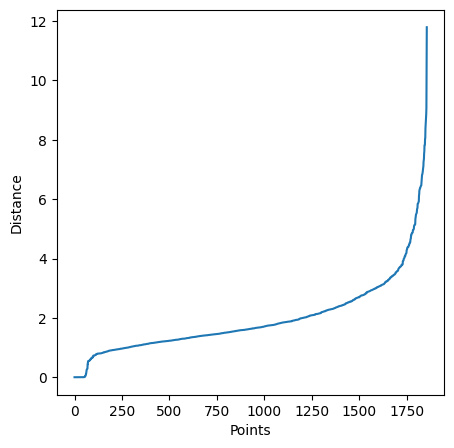

In [22]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

X = df.drop('username', axis=1)

n_n = 2
nearest_neighbors = NearestNeighbors(n_neighbors=n_n)
neighbors = nearest_neighbors.fit(X)

distances, indices = neighbors.kneighbors(X)
distances = np.sort(distances[:,n_n-1], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

3.1252911928340024

<Figure size 500x500 with 0 Axes>

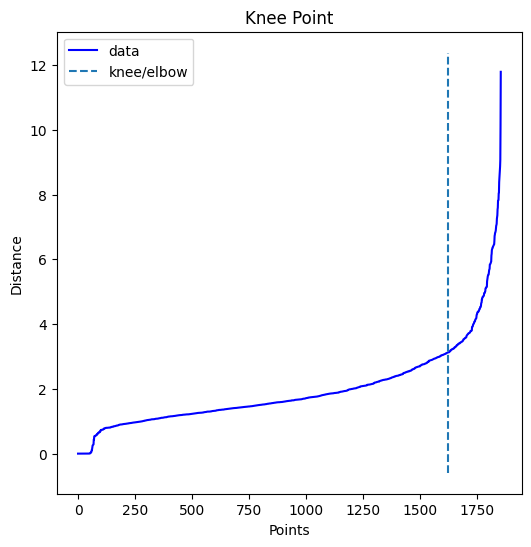

In [23]:
from kneed import KneeLocator
import numpy as np
import matplotlib.pyplot as plt

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

### Melakukan clustering menggunakan HDBSCAN

In [24]:
import hdbscan

X = df.drop('username', axis=1)
eps = float(distances[knee.knee])
# Apply HDBSCAN
min_cluster_size = 33  # Adjust as needed
model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, cluster_selection_epsilon=eps)
clusters = model.fit_predict(X)

# Add the clusters to the original DataFrame
X['cluster'] = clusters

## Hasil

### Jumlah member di setiap cluster



In [25]:
sizes = X.groupby(by='cluster').size().to_frame()
sizes.columns =['size']
sizes

,size
cluster,
-1,595
0,37
1,89
2,1135


### Karena HDBSCAN tidak memiliki centroid. nilai dibawah adalah nilai representasi setiap cluster

In [26]:
rata_rata = np.zeros((4, X.shape[1]))

for i in range(-1,3):
    cluster_points = X[X['cluster'] == i]
    rata_rata[i] = np.mean(cluster_points, axis=0)

# Print cluster centers
print("Cluster Centers:")
print(rata_rata)

Cluster Centers:
[[ 7.47501468  7.44358975  7.33112276  7.83868358  7.02298066  7.44495715
   7.46227651  7.65178553  7.96001931  7.83085194  7.92266146  7.34934153
   7.46930841  7.47038458  0.          7.64154815  7.99340384  0.        ]
 [ 0.16958119  0.16335169  0.13778465  0.16900598  0.11054384  0.1643919
   0.1698676   0.1585406   0.17965597  0.14719962  0.16161235  0.12009808
   0.14543061  0.13311504  0.15743458  0.15112995  0.20325592  1.        ]
 [ 6.64648297  6.67760687  6.581778    7.04207766  6.02365036  6.59962279
   6.40331131  6.71208109  6.96687755  6.99865316  7.07648498  6.54944259
   6.67420748  6.91020875  6.90513986  6.8044393   7.09749365  2.        ]
 [ 5.81705265  5.78055728  5.6629842   6.24307221  4.74944362  5.75155478
   5.40357781  4.74797088  4.69555909  6.17706846  6.26777783  5.72679715
   5.86425205  6.10652731  4.47296477  6.07279012  6.16648297 -1.        ]]


### Rata - rata rating setiap cluster

In [27]:
for i, centroid in zip(range(3),rata_rata[1:]):
  sum = 0
  for poin in centroid[:17]:
    sum += poin
  sum /= 17
  print('Rata - rata rating di cluster', i, 'adalah', sum)


Rata - rata rating di cluster 0 adalah 0.15541173935243346
Rata - rata rating di cluster 1 adalah 6.745268139970925
Rata - rata rating di cluster 2 adalah 5.629790187230928


### Untuk mengambil top 2 Genre setiap cluster. Diambil 3 nilai terbesar dikarenakan berkemungkinan kolom cluster ada di salah satunya.

In [28]:
import numpy as np

# Get the indices of the three largest values for each array
indices_top3 = np.argsort(-rata_rata, axis=1)[1:, :3]

print(indices_top3)

[[17 16  8]
 [16 10  3]
 [10  3  9]]


In [29]:
for i, top3 in zip(range(len(indices_top3)),indices_top3):
  print('Cluster ke -', i)
  for j, top in zip(range(len(top3)),top3):
    print('Top', j+1, '=', X.columns[top])
  print()

Cluster ke - 0
Top 1 = cluster
Top 2 = Thriller
Top 3 = Music

Cluster ke - 1
Top 1 = Thriller
Top 2 = Psychological
Top 3 = Drama

Cluster ke - 2
Top 1 = Psychological
Top 2 = Drama
Top 3 = Mystery



### Visualisasi dalam bentuk 3D menggunakan PCA

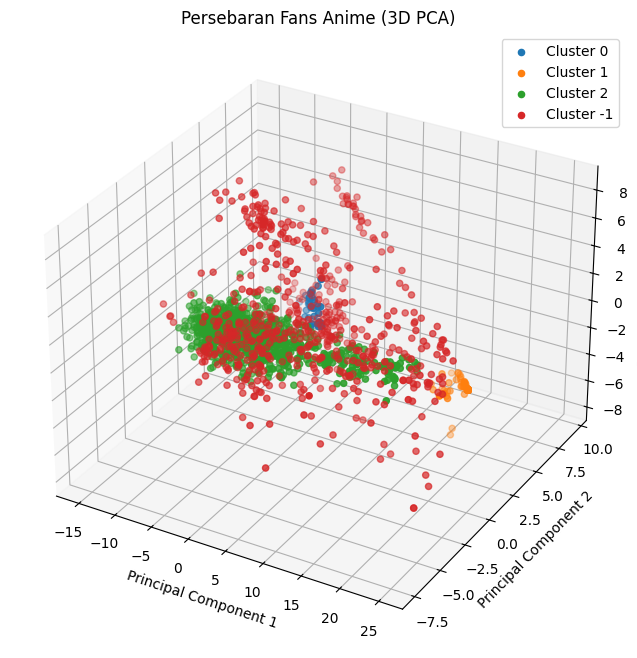

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Step 2: Apply PCA with 3 components for 3D visualization
pca = PCA(n_components=3)
df_3d = pca.fit_transform(df.drop(['username'], axis=1))

# Step 3: Plot the data points in 3D with different colors for each cluster
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in set(model.labels_):
  cluster_points = df_3d[model.labels_ == cluster]
  ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}')

ax.set_title('Persebaran Fans Anime (3D PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

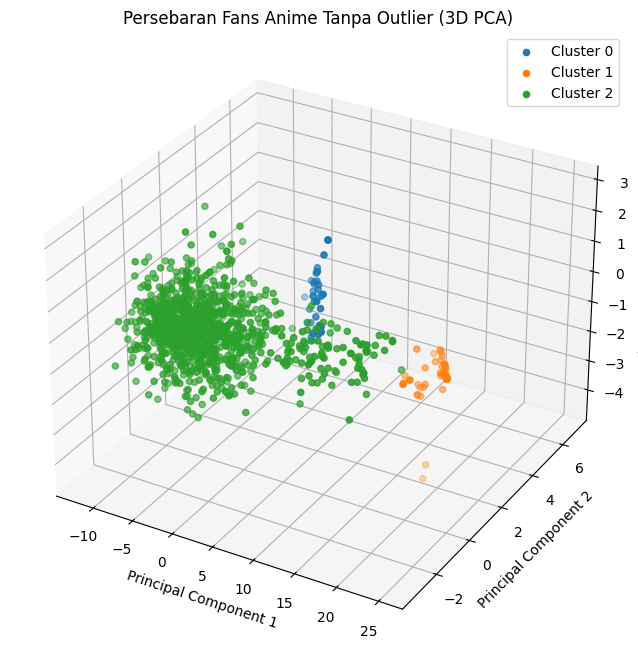

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Step 2: Apply PCA with 3 components for 3D visualization
pca = PCA(n_components=3)
df_3d = pca.fit_transform(df.drop(['username'], axis=1))

# Step 3: Plot the data points in 3D with different colors for each cluster
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in set(model.labels_):
  if cluster == -1:
    continue
  cluster_points = df_3d[model.labels_ == cluster]
  ax.scatter(cluster_points[:, 0], cluster_points[:, 1], cluster_points[:, 2], label=f'Cluster {cluster}')

ax.set_title('Persebaran Fans Anime Tanpa Outlier (3D PCA)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()
plt.show()

### Visualisasi dalam bentuk 2D menggunakan PCA

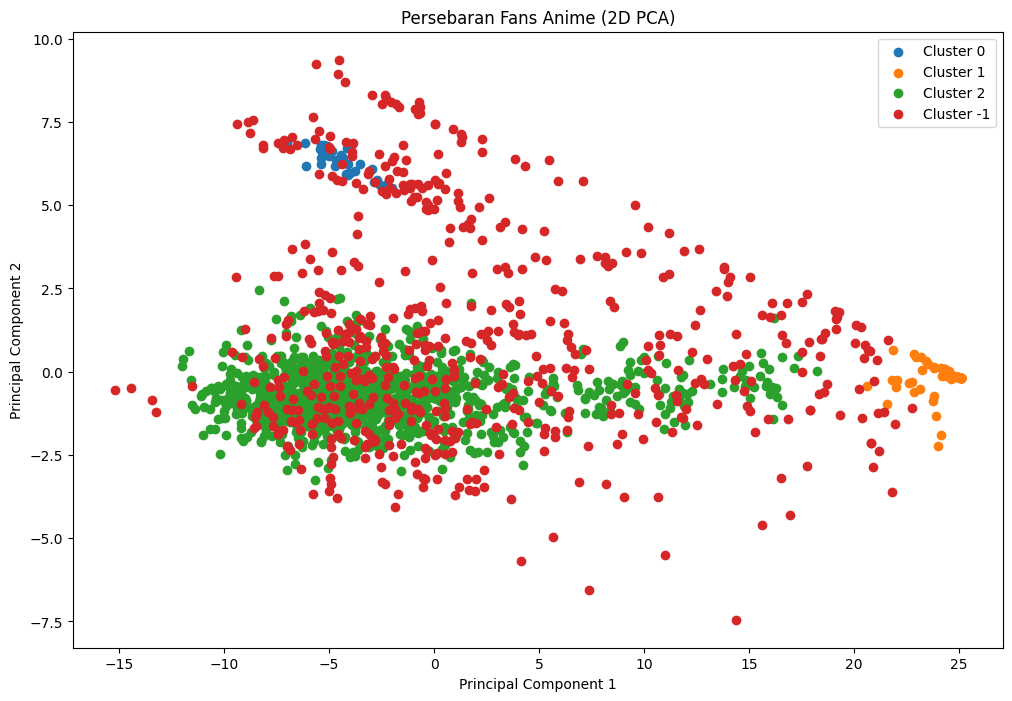

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_2d = pca.fit_transform(df.drop(['username'], axis=1))

plt.figure(figsize=(12, 8))

for cluster in set(model.labels_):
  cluster_points = df_2d[model.labels_ == cluster]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Persebaran Fans Anime (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


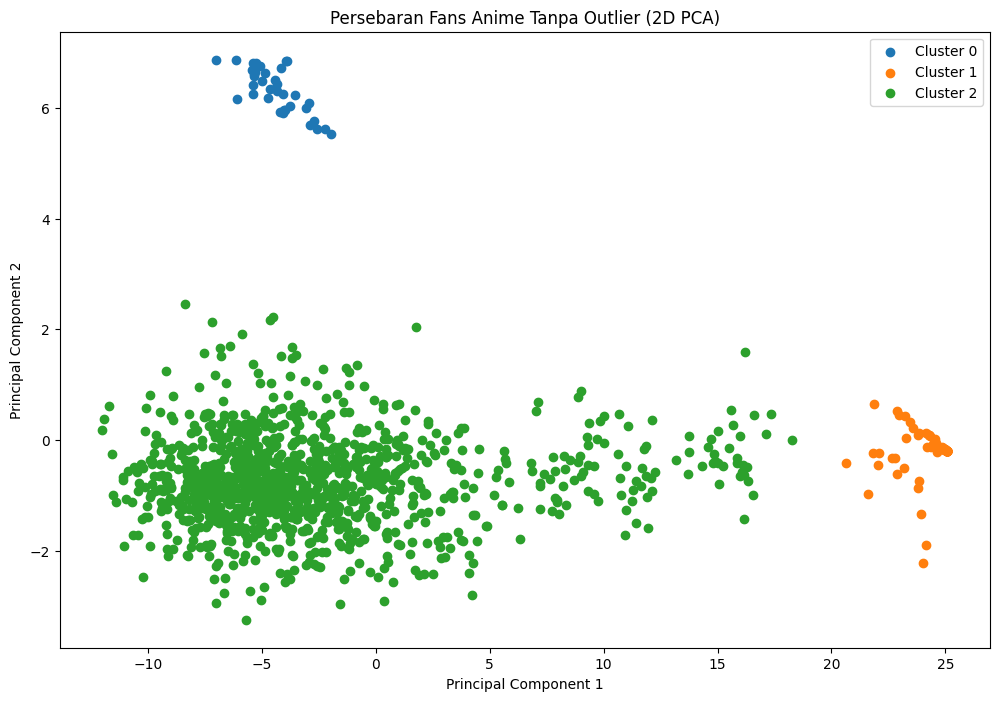

In [33]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_2d = pca.fit_transform(df.drop(['username'], axis=1))

plt.figure(figsize=(12, 8))

for cluster in set(model.labels_):
  if cluster == -1:
    continue
  cluster_points = df_2d[model.labels_ == cluster]
  plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}')

plt.title('Persebaran Fans Anime Tanpa Outlier (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


## Evaluasi Model

In [34]:
from sklearn.metrics import silhouette_score

print('silhouette score =', silhouette_score(X, model.labels_, metric='euclidean'))

silhouette score = 0.13768089894960248


In [35]:
from sklearn.metrics import davies_bouldin_score

print('dbi score =', davies_bouldin_score(X, model.labels_))

dbi score = 1.6713219352803095
